In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_excel("Indy GP Analysis.xlsx")

data

,Driver,25 STP,25 THE,25 LBH,25 ALA,24 INDY,23 INDY2,23 INDY1,22 INDY2,22 INDY1,...,21 INDY1,20 INDY3,20 INDY2,20 INDY1,19 INDY,18 INDY,17 INDY,16 INDY,15 INDY,14 INDY
0,Alex Palou,1,1,2,1,1.0,7.0,1.0,10.0,18.0,...,3.0,9.0,17.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Christian Lungaard,8,3,3,2,3.0,4.0,4.0,2.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kyle Kirkwood,5,8,1,11,11.0,9.0,14.0,23.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pato O'Ward,11,2,13,6,13.0,3.0,2.0,12.0,19.0,...,15.0,5.0,22.0,8.0,19.0,NaN,NaN,NaN,NaN,NaN
4,Scott McLaughlin,4,27,6,3,6.0,8.0,16.0,4.0,20.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Felix Rosenqvist,7,5,4,13,10.0,27.0,5.0,9.0,6.0,...,17.0,11.0,5.0,15.0,8.0,NaN,NaN,NaN,NaN,NaN
6,Scott Dixon,3,10,8,12,4.0,1.0,6.0,8.0,10.0,...,9.0,8.0,9.0,1.0,2.0,2.0,2.0,7.0,10.0,15.0
7,Colton Herta,16,4,7,7,7.0,13.0,9.0,24.0,1.0,...,13.0,2.0,4.0,4.0,23.0,NaN,NaN,NaN,NaN,NaN
8,Will Power,26,6,5,5,2.0,6.0,12.0,3.0,3.0,...,11.0,1.0,6.0,20.0,7.0,1.0,1.0,19.0,1.0,8.0
9,Alexander Rossi,10,9,15,8,8.0,5.0,3.0,1.0,11.0,...,7.0,3.0,2.0,25.0,22.0,5.0,8.0,10.0,NaN,NaN


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [18]:
# Load Excel file and read sheet 1
xls = pd.ExcelFile("Indy RC Analysis.xlsx")
df = xls.parse(xls.sheet_names[0])
df.columns = df.columns.map(str)

df

,Driver,25 STP,25 THE,25 LBH,25 ALA,24 INDY,23 INDY2,23 INDY1,22 INDY2,22 INDY1,...,21 INDY1,20 INDY3,20 INDY2,20 INDY1,19 INDY,18 INDY,17 INDY,16 INDY,15 INDY,14 INDY
0,Alex Palou,1,1,2,1,1.0,7.0,1.0,10.0,18.0,...,3.0,9.0,17.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Christian Lungaard,8,3,3,2,3.0,4.0,4.0,2.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kyle Kirkwood,5,8,1,11,11.0,9.0,14.0,23.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pato O'Ward,11,2,13,6,13.0,3.0,2.0,12.0,19.0,...,15.0,5.0,22.0,8.0,19.0,NaN,NaN,NaN,NaN,NaN
4,Scott McLaughlin,4,27,6,3,6.0,8.0,16.0,4.0,20.0,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Felix Rosenqvist,7,5,4,13,10.0,27.0,5.0,9.0,6.0,...,17.0,11.0,5.0,15.0,8.0,NaN,NaN,NaN,NaN,NaN
6,Scott Dixon,3,10,8,12,4.0,1.0,6.0,8.0,10.0,...,9.0,8.0,9.0,1.0,2.0,2.0,2.0,7.0,10.0,15.0
7,Colton Herta,16,4,7,7,7.0,13.0,9.0,24.0,1.0,...,13.0,2.0,4.0,4.0,23.0,NaN,NaN,NaN,NaN,NaN
8,Will Power,26,6,5,5,2.0,6.0,12.0,3.0,3.0,...,11.0,1.0,6.0,20.0,7.0,1.0,1.0,19.0,1.0,8.0
9,Alexander Rossi,10,9,15,8,8.0,5.0,3.0,1.0,11.0,...,7.0,3.0,2.0,25.0,22.0,5.0,8.0,10.0,NaN,NaN


In [19]:
# Correct column names
current_year_cols = ['25 STP', '25 THE', '25 LBH', '25 ALA']
ims_rc_cols = [
    '24 INDY', '23 INDY2', '23 INDY1', '22 INDY2', '22 INDY1',
    '21 INDY2', '21 INDY1', '20 INDY3', '20 INDY2', '20 INDY1',
    '19 INDY', '18 INDY', '17 INDY', '16 INDY', '15 INDY', '14 INDY']

In [20]:
# Keep only needed columns
df_filtered = df[['Driver'] + current_year_cols + ims_rc_cols].copy()

In [21]:
# Convert to numeric and fill missing values with a high number (e.g., 30th place)
for col in current_year_cols + ims_rc_cols:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce').fillna(30)

In [22]:
# Feature engineering
df_filtered['avg_2025'] = df_filtered[current_year_cols].mean(axis=1)
df_filtered['avg_ims_rc'] = df_filtered[ims_rc_cols].mean(axis=1)
df_filtered['ims_rc_races'] = (df_filtered[ims_rc_cols] != 30).sum(axis=1)

In [23]:
# Combine features into model input
X = df_filtered[['avg_2025', 'avg_ims_rc', 'ims_rc_races']]

In [24]:
# We'll use avg_ims_rc as a proxy for target (since IMS 2025 hasn’t happened yet)
y = df_filtered['avg_ims_rc']

In [25]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Fit model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_scaled, y)

RandomForestRegressor(random_state=42)

In [27]:
# Predict 2025 IMS finish
df_filtered['predicted_finish'] = model.predict(X_scaled)

In [33]:
# Sort and display predicted order
df_predicted = df_filtered[['Driver', 'predicted_finish']].sort_values(by='predicted_finish')

print(df_predicted.round(1))

                 Driver  predicted_finish
8            Will Power               7.0
6           Scott Dixon               7.2
15         Graham Rahal               7.8
9       Alexander Rossi              10.7
10      Josef Newgarden              11.6
7          Colton Herta              16.2
12      Marcus Ericsson              16.8
5      Felix Rosenqvist              17.0
3           Pato O'Ward              17.0
0            Alex Palou              18.3
11         Rinus VeeKay              19.3
21           Conor Daly              20.2
1    Christian Lungaard              21.6
4      Scott McLaughlin              22.3
14     Santino Ferrucci              24.2
2         Kyle Kirkwood              25.6
23         Callum Ilott              26.3
17        David Malukas              26.8
25   Devlin DeFrancesco              27.0
13     Marcus Armstrong              27.3
20       Sting Ray Robb              28.6
18  Christian Rasmussen              29.5
16       Kyffin Simpson           

In [38]:
import pandas as pd
import numpy as np

# Load the Excel file and the 'Analysis' sheet
file_path = "Indy GP Prediction.xlsx"  # Update this if the path is different
df = pd.read_excel(file_path, sheet_name="Analysis")

# Define the columns and their respective weights
columns = ['2025 AVG', 'INDY GP AVG', '2025 MAX', '2025 MIN', 'INDY GP MAX', 'INDY GP MIN', 'STR POS']
weights = np.array([0.35, 0.23, 0.04, 0.04, 0.03, 0.03, 0.28])

# Calculate the weighted score
df['Weighted Score'] = df[columns].dot(weights)

# Approximate standard deviation for each row:
# Assume '2025 STDEV' applies to all 2025 columns and STR POS, and 'INDY GP STDEV' to INDY GP columns
std_dev_map = {
    '2025 AVG': '2025 STDEV',
    '2025 MAX': '2025 STDEV',
    '2025 MIN': '2025 STDEV',
    'STR POS': '2025 STDEV',
    'INDY GP AVG': 'INDY GP STDEV',
    'INDY GP MAX': 'INDY GP STDEV',
    'INDY GP MIN': 'INDY GP STDEV'
}

# Create an array of variances using mapped std dev columns
variances = np.array([
    df[std_dev_map[col]] ** 2 for col in columns
]).T  # Transpose to align with rows

# Compute the weighted variance and standard deviation
weighted_variance = (weights ** 2 * variances).sum(axis=1)
df['Weighted Std Dev'] = np.sqrt(weighted_variance)

# Compute 95% confidence interval
df['CI Lower'] = df['Weighted Score'] - 1.96 * df['Weighted Std Dev']
df['CI Upper'] = df['Weighted Score'] + 1.96 * df['Weighted Std Dev']

# Display the output
print(df[['Driver', 'Weighted Score', 'Weighted Std Dev', 'CI Lower', 'CI Upper']])


                 Driver  Weighted Score  Weighted Std Dev   CI Lower  \
0            Alex Palou        4.253500          2.059675   0.216537   
1    Christian Lungaard        7.443333          1.530608   4.443342   
2         Kyle Kirkwood       13.415500          2.608531   8.302779   
3           Pato O'Ward        8.931818          2.783091   3.476959   
4      Scott McLaughlin        9.422857          5.437605  -1.234849   
5      Felix Rosenqvist       10.088409          2.372749   5.437821   
6           Scott Dixon       10.103125          2.077727   6.030780   
7          Colton Herta       10.318636          3.015139   4.408964   
8            Will Power        8.971250          4.897145  -0.627154   
9       Alexander Rossi        9.767857          2.186893   5.481546   
10      Josef Newgarden       11.115000          4.900154   1.510698   
11         Rinus VeeKay       15.704500          3.826871   8.203833   
12      Marcus Ericsson       15.254318          3.448918   8.49

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the data
file_path = "Indy GP Prediction.xlsx"
df = pd.read_excel(file_path, sheet_name="Analysis")

# Define feature columns (independent variables)
features = ['2025 AVG', 'INDY GP AVG', '2025 MAX', '2025 MIN', 
            'INDY GP MAX', 'INDY GP MIN', 'STR POS']

# Define the target variable (you can swap this with actual historical finishes if available)
target = 'PREDICTED POSITION'  # Change this if you have actual race finish data

# Drop rows with missing data just in case
df = df.dropna(subset=features + [target])

# Prepare X and y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
df['ML Predicted Finish'] = model.predict(X)

# Evaluate performance
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Show results
print(df[['Driver', 'ML Predicted Finish']].sort_values('ML Predicted Finish'))

MAE: 2.4868995751603505e-15
R² Score: 1.0
                 Driver  ML Predicted Finish
0            Alex Palou             4.013500
1    Christian Lungaard             4.083333
6           Scott Dixon             6.263125
3           Pato O'Ward             7.011818
7          Colton Herta             7.198636
5      Felix Rosenqvist             7.208409
8            Will Power             7.291250
9       Alexander Rossi             7.607857
2         Kyle Kirkwood             8.375500
4      Scott McLaughlin             8.462857
15         Graham Rahal             9.020625
10      Josef Newgarden             9.675000
11         Rinus VeeKay             9.944500
12      Marcus Ericsson            10.454318
13     Marcus Armstrong            11.508333
14     Santino Ferrucci            11.577500
17        David Malukas            12.872500
21           Conor Daly            13.469500
18  Christian Rasmussen            13.647500
16       Kyffin Simpson            14.490000
23         Ca

Random Forest MAE: 1.4300207770562756
Random Forest R² Score: 0.6467157311754093


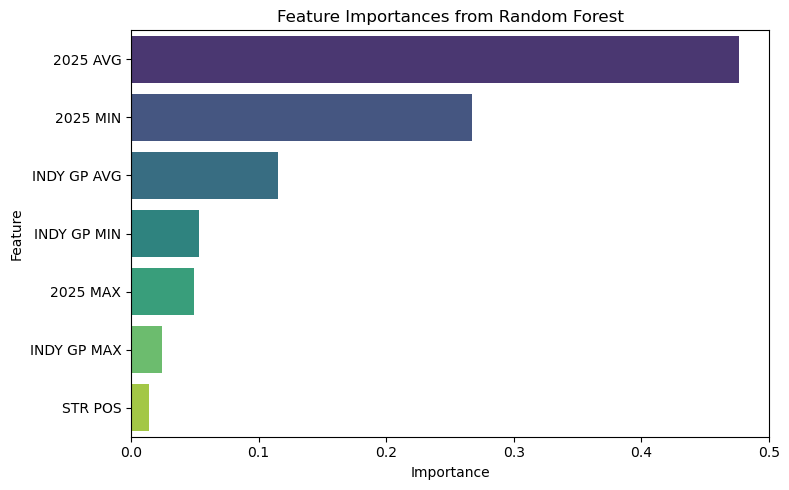

                 Driver  RF Predicted Finish
1    Christian Lungaard             5.357632
6           Scott Dixon             6.254858
0            Alex Palou             6.811985
3           Pato O'Ward             7.154373
7          Colton Herta             7.416864
5      Felix Rosenqvist             7.568314
8            Will Power             7.620174
4      Scott McLaughlin             8.414158
2         Kyle Kirkwood             8.589707
9       Alexander Rossi             8.982684
10      Josef Newgarden             9.759309
11         Rinus VeeKay             9.888116
12      Marcus Ericsson            10.463627
15         Graham Rahal            11.125692
14     Santino Ferrucci            11.629685
13     Marcus Armstrong            11.962857
17        David Malukas            13.415302
21           Conor Daly            13.642973
18  Christian Rasmussen            13.781077
23         Callum Ilott            14.013990
16       Kyffin Simpson            14.179612
25   Devli

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "Indy GP Prediction.xlsx"
df = pd.read_excel(file_path, sheet_name="Analysis")

# Define features and target
features = ['2025 AVG', 'INDY GP AVG', '2025 MAX', '2025 MIN', 
            'INDY GP MAX', 'INDY GP MIN', 'STR POS']
target = 'PREDICTED POSITION'  # Replace with real historical finish if available

# Clean and prep
df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
df['RF Predicted Finish'] = model.predict(X)
y_pred = model.predict(X_test)

print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))
print("Random Forest R² Score:", r2_score(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="viridis")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

# Show predicted finishes
print(df[['Driver', 'RF Predicted Finish']].sort_values('RF Predicted Finish'))

Random Forest MAE: 1.4300207770562756
Random Forest R² Score: 0.6467157311754093


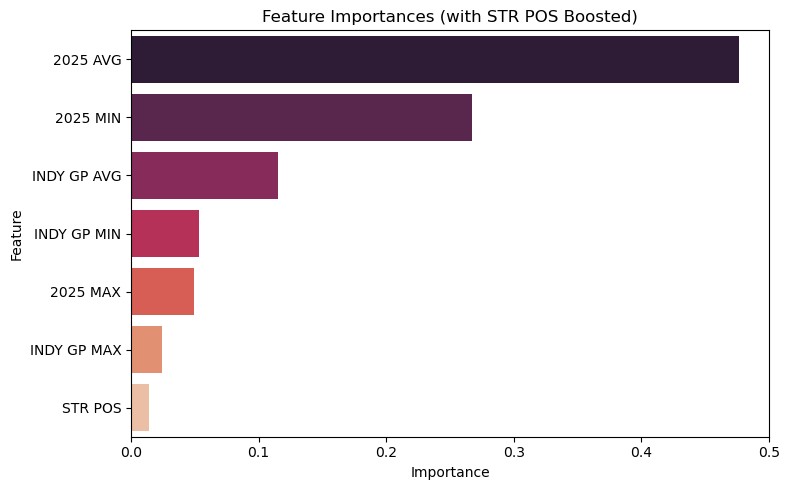

                 Driver  RF Predicted Finish
1    Christian Lungaard             5.357632
6           Scott Dixon             6.254858
0            Alex Palou             6.811985
3           Pato O'Ward             7.154373
7          Colton Herta             7.416864
5      Felix Rosenqvist             7.568314
8            Will Power             7.620174
4      Scott McLaughlin             8.414158
2         Kyle Kirkwood             8.589707
9       Alexander Rossi             8.982684
10      Josef Newgarden             9.759309
11         Rinus VeeKay             9.888116
12      Marcus Ericsson            10.463627
15         Graham Rahal            11.125692
14     Santino Ferrucci            11.629685
13     Marcus Armstrong            11.962857
17        David Malukas            13.415302
21           Conor Daly            13.642973
18  Christian Rasmussen            13.781077
23         Callum Ilott            14.013990
16       Kyffin Simpson            14.179612
25   Devli

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = "Indy GP Prediction.xlsx"
df = pd.read_excel(file_path, sheet_name="Analysis")

# Base features
base_features = ['2025 AVG', 'INDY GP AVG', '2025 MAX', '2025 MIN',
                 'INDY GP MAX', 'INDY GP MIN', 'STR POS']

# Target variable
target = 'PREDICTED POSITION'  # Replace with actual finish if available

# Drop rows with missing data
df = df.dropna(subset=base_features + [target])

# Copy features to new DataFrame
X = df[base_features].copy()

# 🚀 Increase the importance of Starting Position
X['STR POS'] = X['STR POS'] * 100.0  # Boosting starting position
X['STR_POS_x_2025AVG'] = X['STR POS'] * X['2025 AVG']  # Interaction feature

# Final feature list
features = X.columns.tolist()
y = df[target]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
df['RF Predicted Finish'] = model.predict(X)
y_pred = model.predict(X_test)

# Evaluation
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred))
print("Random Forest R² Score:", r2_score(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="rocket")
plt.title("Feature Importances (with STR POS Boosted)")
plt.tight_layout()
plt.show()

# Show top predictions
print(df[['Driver', 'RF Predicted Finish']].sort_values('RF Predicted Finish'))

C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\Ethan\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fi

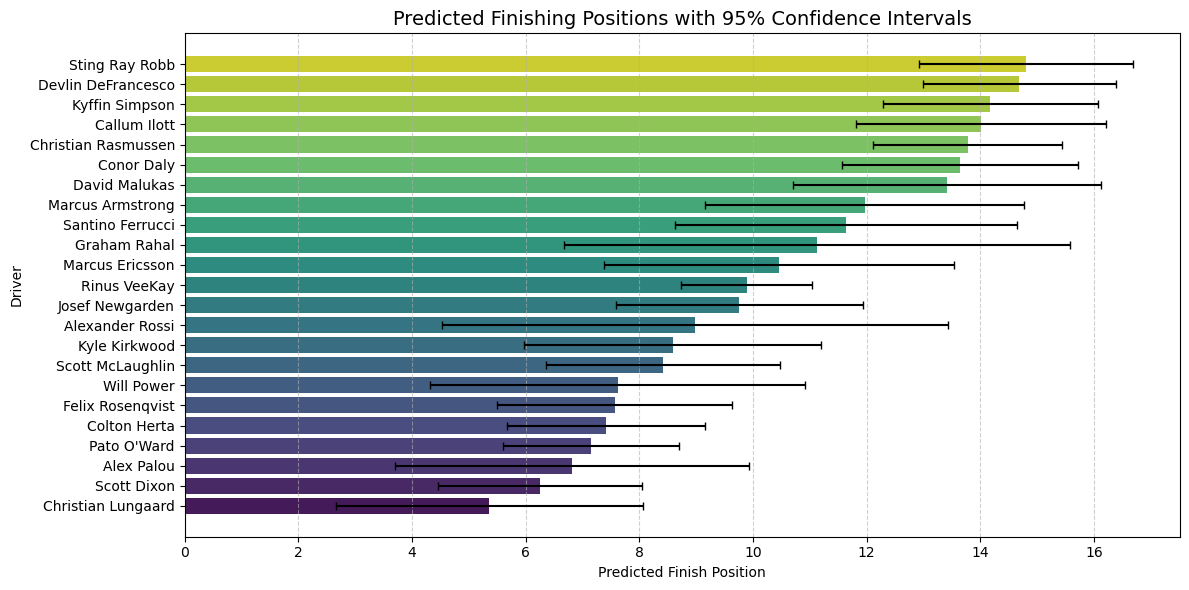

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get predictions from each tree in the forest
all_tree_preds = np.stack([tree.predict(X) for tree in model.estimators_], axis=1)

# Calculate standard deviation across trees for each prediction
df['RF Std Dev'] = all_tree_preds.std(axis=1)

# Calculate 95% Confidence Intervals
df['CI Lower'] = df['RF Predicted Finish'] - 1.96 * df['RF Std Dev']
df['CI Upper'] = df['RF Predicted Finish'] + 1.96 * df['RF Std Dev']

# Prepare data for plotting
plot_df = df[['Driver', 'RF Predicted Finish', 'CI Lower', 'CI Upper']].copy()
plot_df = plot_df.sort_values('RF Predicted Finish').reset_index(drop=True)

# Compute error bars
errors = plot_df['CI Upper'] - plot_df['RF Predicted Finish']

# Plot with error bars
plt.figure(figsize=(12, 6))
sns.barplot(x='RF Predicted Finish', y='Driver', data=plot_df, palette='viridis', orient='h')

# Add error bars (confidence intervals)
plt.errorbar(x=plot_df['RF Predicted Finish'], 
             y=np.arange(len(plot_df)), 
             xerr=errors, fmt='none', ecolor='black', capsize=3)

# Final touches
plt.title('Predicted Finishing Positions with 95% Confidence Intervals', fontsize=14)
plt.xlabel('Predicted Finish Position')
plt.ylabel('Driver')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Load Excel file and Sheet 2
xls = pd.ExcelFile("Indy GP Analysis.xlsx")
df = xls.parse(xls.sheet_names[0])
df.columns = df.columns.map(str)

# Correct column names
current = ['25 STP', '25 THE', '25 LBH', '25 ALA']
ims_rc = [
    '24 INDY', '23 INDY2', '23 INDY1', '22 INDY2', '22 INDY1',
    '21 INDY2', '21 INDY1', '20 INDY3', '20 INDY2', '20 INDY1',
    '19 INDY', '18 INDY', '17 INDY', '16 INDY', '15 INDY', '14 INDY']

w_2025 = 2
w_past = 1

df['weighted_position'] = (
    sum(df[col] * w_2025 for col in current) +
    sum(df[col] * w_past for col in ims_rc)
) / (w_2025 * len(current) + w_past * len(ims_rc))

# Define features and target
X = df['25 STP', '25 THE', '25 LBH', '25 ALA', '24 INDY', '23 INDY2', '23 INDY1', '22 INDY2', '22 INDY1',
    '21 INDY2', '21 INDY1', '20 INDY3', '20 INDY2', '20 INDY1',
    '19 INDY', '18 INDY', '17 INDY', '16 INDY', '15 INDY', '14 INDY']
y = df['weighted_position']  # Target is the weighted finishing position

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model with weighted averaging: {mse}')

KeyError: ('25 STP', '25 THE', '25 LBH', '25 ALA', '24 INDY', '23 INDY2', '23 INDY1', '22 INDY2', '22 INDY1', '21 INDY2', '21 INDY1', '20 INDY3', '20 INDY2', '20 INDY1', '19 INDY', '18 INDY', '17 INDY', '16 INDY', '15 INDY', '14 INDY')

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assume the DataFrame `df` has already been prepared with features X_2025, X_past, and target variable y

# Example of splitting the data (if you need to train and test)
X_2025 = df[['feature1_2025', 'feature2_2025']]  # Example features for 2025
X_past = df[['feature1_past', 'feature2_past']]  # Example features for past races
y = df['finishing_position']  # Target variable (e.g., finishing position)

# Split data into train and test sets
X_train_2025, X_test_2025, y_train, y_test = train_test_split(X_2025, y, test_size=0.2, random_state=42)
X_train_past, X_test_past = train_test_split(X_past, test_size=0.2, random_state=42)

# Train models on separate data
model_2025 = LinearRegression()
model_2025.fit(X_train_2025, y_train)

model_past = LinearRegression()
model_past.fit(X_train_past, y_train)

# Combine models using a weighted VotingRegressor
ensemble_model = VotingRegressor(estimators=[('past', model_past), ('2025', model_2025)], weights=[1, 2])

# Train the ensemble model
ensemble_model.fit(X_train_past, y_train)  # We use past data for ensemble training

# Make predictions
y_pred = ensemble_model.predict(X_test_past)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the ensemble model: {mse}')

KeyError: "None of [Index(['feature1_2025', 'feature2_2025'], dtype='object')] are in the [columns]"

In [32]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Example DataFrame
# Let's assume 'df' has columns for each year position ('position_2025', 'position_2024', ..., 'position_2010') and the target variable 'finishing_position'.
# Note: Replace this with your actual DataFrame loading method.

# Data (example)
# df = pd.read_csv('your_data.csv')

# Define the decay factor (e.g., 0.9 means each previous year's result is 90% of the weight of the previous year)
decay_factor = 0.9
years = list(range(2025, 2009, -1))  # 2025, 2024, ..., 2010

# Weights for each year based on time decay
weights = [decay_factor**(2025 - year) for year in years]

# Create weighted average of positions
df['weighted_position'] = sum(df[f'position_{year}'] * weight for year, weight in zip(years, weights)) / sum(weights)

# Example: Now df['weighted_position'] will contain the weighted average position of each driver based on the decay factor.

# Define features and target
X = df[['feature1', 'feature2', 'feature3']]  # Replace with actual feature columns
y = df['weighted_position']  # Target is the weighted finishing position

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error of the model with time decay: {mse}')


KeyError: 'position_2025'

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example Data: 'positions_2025' as binary target (e.g., top 10 finish or not)
# 'feature1', 'feature2' can be continuous features (driver statistics)
X = df['25 STP', '25 THE', '25 LBH', '25 ALA',
    '24 INDY', '23 INDY2', '23 INDY1', '22 INDY2', '22 INDY1',
    '21 INDY2', '21 INDY1', '20 INDY3', '20 INDY2', '20 INDY1',
    '19 INDY', '18 INDY', '17 INDY', '16 INDY', '15 INDY', '14 INDY']  # Replace with actual feature columns
y = (df['position_2025'] <= 10).astype(int)  # Binary target: 1 if finished in top 10, else 0

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Plotting the scatter plot and logistic regression decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_test['feature1'], X_test['feature2'], c=y_test, cmap='coolwarm', label='Driver Positions')

# Generate a grid of points to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_test['feature1'].min(), X_test['feature1'].max(), 100),
                     np.linspace(X_test['feature2'].min(), X_test['feature2'].max(), 100))

# Predict the probability of each point in the grid
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Probability of Top 10 Finish')
plt.show()

KeyError: "None of [Index(['feature1', 'feature2'], dtype='object')] are in the [columns]"

In [37]:
install.packages("shiny")
install.packages("ggplot2")
install.packages("dplyr")

NameError: name 'install' is not defined

In [ ]:
library(shiny)
library(ggplot2)
library(dplyr)

# Sample data
drivers_data <- data.frame(
  driver = c('Driver A', 'Driver B', 'Driver C', 'Driver D'),
  position_2025 = c(5, 8, 2, 12),
  position_2024 = c(3, 9, 5, 14),
  position_2023 = c(6, 7, 4, 11)
)

# Define UI for application
ui <- fluidPage(
  titlePanel("IMS Road Course Driver Results"),
  
  sidebarLayout(
    sidebarPanel(
      # Dropdown menu to select year
      selectInput("year", "Select Year", choices = c("2025", "2024", "2023")),
      
      # Checkbox to select drivers
      checkboxGroupInput("drivers", "Select Drivers", 
                         choices = unique(drivers_data$driver),
                         selected = unique(drivers_data$driver))
    ),
    
    mainPanel(
      plotOutput("scatterPlot")  # Output plot
    )
  )
)

# Define server logic
server <- function(input, output) {
  
  # Reactive expression to filter data based on selected year and drivers
  filtered_data <- reactive({
    selected_drivers <- input$drivers
    selected_year <- paste0("position_", input$year)
    
    # Filter the data based on the selected year and drivers
    drivers_data %>%
      filter(driver %in% selected_drivers) %>%
      select(driver, selected_year)
  })
  
  # Render scatter plot based on selected data
  output$scatterPlot <- renderPlot({
    data <- filtered_data()
    
    # Create scatter plot
    ggplot(data, aes_string(x = "driver", y = colnames(data)[2])) +
      geom_point() +
      labs(title = paste("Driver Positions in", input$year),
           x = "Driver",
           y = paste("Position in", input$year)) +
      theme(axis.text.x = element_text(angle = 45, hjust = 1))
  })
}

# Run the application
shinyApp(ui = ui, server = server)